In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as sla
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
props = XSteam(XSteam.UNIT_SYSTEM_BARE)

In [49]:
qpp = 500e3
D = 0.01
Af = np.pi / 4 * D**2
xi = np.pi * D

p0 = 0.101325
t0 = 85.0 + 273.15
G = 1e3
muf = 281.66e-6
hfg = (props.hV_p(p0) - props.hL_p(p0)) * 1000
X_e0 = (props.h_pt(p0,t0) - props.hL_p(p0)) / hfg *1000
cp = props.Cp_pt(p0,t0) * 1000
k = props.tc_pt(p0,t0)

X_e = lambda z : qpp*xi / (Af*G*hfg) * z + X_e0
x0 = sp.optimize.root(X_e, [1.]).x[0]

X_e1 = lambda z: X_e(z) - 1
x1 = sp.optimize.root(X_e1, [1.]).x[0]

def Tfluid(z):
    if z < x0:
        return X_e(z) * hfg / cp+ 373.15
    else: 
        return props.tsat_p(p0)

In [60]:
Pr = cp * muf / k
Re = G * D / muf
hl = .023 * Re**(.8) * Pr**(.4) * k / D
rhorat = props.rhoL_p(p0) / props.rhoV_p(p0)
F = lambda X: 1 if X<0 else (1 + X * Pr * (rhorat - 1)) ** (0.35)
S = lambda X: (1 + 0.055 * F(X)**(.1) * Re**(.16)) ** (-1)
pr = p0 / 22.12
hp = 55 * pr**(.12) * (qpp) **(2/3) * (-np.log10(pr))**(-.55) * 18**(-.5)

def WallTemp(z):
    phi1 = qpp / hl + Tfluid(z)
    if phi1 < 100.0:
        return phi1

    else:
        phi2 = lambda Tw: qpp**2 - (F(X_e(z))*hl *(Tw - Tfluid(z))) **2 - (S(X_e(z)) * hp * (Tw - 373.15))**2
        return sp.optimize.root(phi2, [373.15]).x[0]

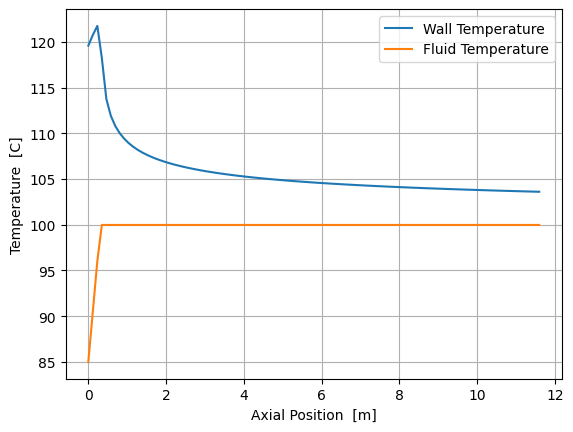

In [65]:
z = np.linspace(0,x1,101)
plt.plot(z,[WallTemp(_) - 273.15 for _ in z], label =  'Wall Temperature')
plt.plot(z, [Tfluid(_) - 273.15 for _ in z], label = 'Fluid Temperature')
plt.ylabel('Temperature  [C]')
plt.xlabel('Axial Position  [m]')
plt.grid()
plt.legend()
plt.savefig('fig.png', dpi= 600)
plt.show()

In [66]:
x0

np.float64(0.3150526509758452)